<a href="https://colab.research.google.com/github/govardhan-06/ML-models/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("Car_Data.csv")
df.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


### EDA + Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [ ]:
df.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

#### Insights: There are no null values

In [ ]:
df.drop(["ID"],axis=1,inplace=True)

In [ ]:
df.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [ ]:
df['Brand'].value_counts()

Brand
Ford             5133
Lexus            5125
Tesla            5088
Volvo            5087
Toyota           5065
Chevrolet        5064
Nissan           5054
Porsche          5026
Honda            5017
Mercedes-Benz    4986
Volkswagen       4983
Jeep             4971
Hyundai          4963
Audi             4955
Jaguar           4933
BMW              4921
Land Rover       4919
Kia              4911
Mazda            4900
Subaru           4899
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
df.groupby('Brand')['Model'].value_counts()

Brand          Model          
Audi           Generic Model 2    1695
               Generic Model 1    1633
               Generic Model 3    1627
BMW            Generic Model 2    1680
               Generic Model 3    1640
               Generic Model 1    1601
Chevrolet      Generic Model 1    1728
               Generic Model 3    1705
               Generic Model 2    1631
Ford           F-150               893
               Explorer            876
               Mustang             866
               Focus               857
               Edge                855
               Escape              786
Honda          CR-V                860
               Civic               843
               Accord              837
               Fit                 831
               Pilot               824
               Odyssey             822
Hyundai        Generic Model 3    1688
               Generic Model 1    1680
               Generic Model 2    1595
Jaguar         Generic Model 3   

#### Combining brand and model so as to effectively represent the data

In [ ]:
df['Brand_model']=df['Brand']+" "+df['Model']
df.drop(["Brand","Model"],axis=1,inplace=True)
df.head()

,Year,Color,Mileage,Price,Condition,Brand_model
0,2003,Blue,22932,65732,New,Mazda Generic Model 3
1,2003,Silver,89937,58620,New,Jaguar Generic Model 2
2,2022,Green,36616,50574,New,Land Rover Generic Model 2
3,1997,Black,82812,35436,Used,Porsche Generic Model 2
4,2000,Black,184616,63880,Used,Land Rover Generic Model 3


In [ ]:
df["Condition"].value_counts()

Condition
Used    50033
New     49967
Name: count, dtype: int64

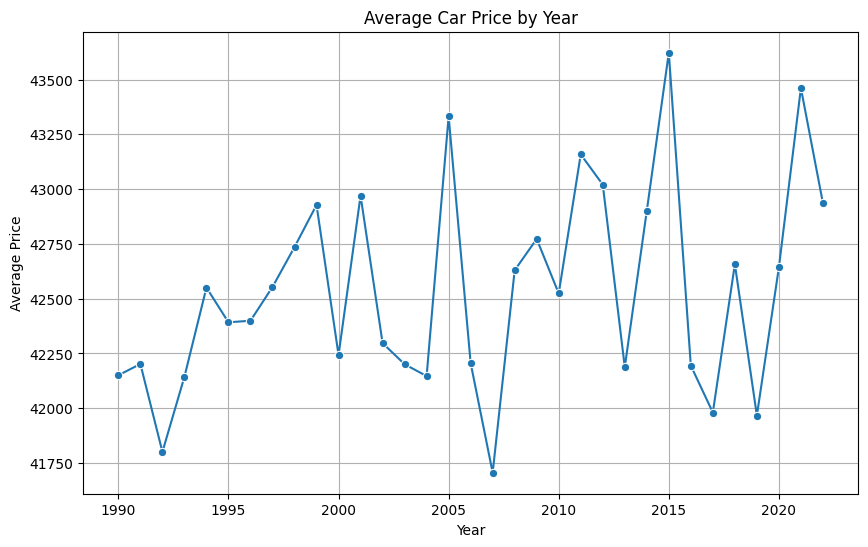

In [ ]:
avg_price_per_year = df.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=avg_price_per_year, marker='o')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
df.groupby('Brand_model')['Price'].mean().sort_values(ascending=False)

Brand_model
Toyota Camry                  44123.025210
Jeep Generic Model 1          43762.899165
Mazda Generic Model 3         43521.406344
Jaguar Generic Model 2        43354.496044
Toyota RAV4                   43335.950226
                                  ...     
Volkswagen Generic Model 3    41523.989196
Jaguar Generic Model 3        41378.304374
Toyota Prius                  41341.024362
Honda Accord                  41336.017921
Ford Escape                   41196.947837
Name: Price, Length: 69, dtype: float64

In [ ]:
pd.reset_option('display.max_rows')
df["Used_Car"]=pd.get_dummies(df['Condition'],dtype=int,drop_first=True)

In [ ]:
df.drop(['Condition'],axis=1,inplace=True)
df.head()

,Year,Color,Mileage,Price,Brand_model,Used_Car
0,2003,Blue,22932,65732,Mazda Generic Model 3,0
1,2003,Silver,89937,58620,Jaguar Generic Model 2,0
2,2022,Green,36616,50574,Land Rover Generic Model 2,0
3,1997,Black,82812,35436,Porsche Generic Model 2,1
4,2000,Black,184616,63880,Land Rover Generic Model 3,1


In [ ]:
df["Color"].unique()

array(['Blue', 'Silver', 'Green', 'Black', 'Red', 'White'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[['Color']])

encoder.transform(df[['Color']]).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:
encoded_color=pd.DataFrame(encoder.transform(df[['Color']]).toarray(),columns=encoder.get_feature_names_out())
encoded_color.head()

,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=pd.concat([df,encoded_color],axis=1)
df.head()

,Year,Color,Mileage,Price,Brand_model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,2003,Blue,22932,65732,Mazda Generic Model 3,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2003,Silver,89937,58620,Jaguar Generic Model 2,0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022,Green,36616,50574,Land Rover Generic Model 2,0,0.0,0.0,1.0,0.0,0.0,0.0
3,1997,Black,82812,35436,Porsche Generic Model 2,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2000,Black,184616,63880,Land Rover Generic Model 3,1,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop('Color',inplace=True,axis=1)
df.head()

,Year,Mileage,Price,Brand_model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,2003,22932,65732,Mazda Generic Model 3,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2003,89937,58620,Jaguar Generic Model 2,0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022,36616,50574,Land Rover Generic Model 2,0,0.0,0.0,1.0,0.0,0.0,0.0
3,1997,82812,35436,Porsche Generic Model 2,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2000,184616,63880,Land Rover Generic Model 3,1,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          100000 non-null  int64  
 1   Mileage       100000 non-null  int64  
 2   Price         100000 non-null  int64  
 3   Brand_model   100000 non-null  object 
 4   Used_Car      100000 non-null  int64  
 5   Color_Black   100000 non-null  float64
 6   Color_Blue    100000 non-null  float64
 7   Color_Green   100000 non-null  float64
 8   Color_Red     100000 non-null  float64
 9   Color_Silver  100000 non-null  float64
 10  Color_White   100000 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 8.4+ MB


In [ ]:
df['Brand_model'].value_counts().count()

69

In [ ]:
brandModelMap=df.groupby('Brand_model')['Price'].mean().to_dict()
brandModelMap

{'Audi Generic Model 1': 43192.23147581139,
 'Audi Generic Model 2': 42179.823008849555,
 'Audi Generic Model 3': 43320.54148740012,
 'BMW Generic Model 1': 43300.20299812617,
 'BMW Generic Model 2': 42409.850595238095,
 'BMW Generic Model 3': 42757.42682926829,
 'Chevrolet Generic Model 1': 42719.414351851854,
 'Chevrolet Generic Model 2': 42605.408951563455,
 'Chevrolet Generic Model 3': 41783.554252199414,
 'Ford Edge': 41828.1567251462,
 'Ford Escape': 41196.947837150125,
 'Ford Explorer': 42061.46118721461,
 'Ford F-150': 42819.447928331465,
 'Ford Focus': 41872.891481913655,
 'Ford Mustang': 42196.379907621245,
 'Honda Accord': 41336.01792114695,
 'Honda CR-V': 41624.132558139536,
 'Honda Civic': 42600.956109134044,
 'Honda Fit': 42123.9302045728,
 'Honda Odyssey': 42397.378345498786,
 'Honda Pilot': 41627.68446601942,
 'Hyundai Generic Model 1': 43287.139285714286,
 'Hyundai Generic Model 2': 42004.657053291536,
 'Hyundai Generic Model 3': 43052.99763033175,
 'Jaguar Generic Mod

In [ ]:
df.Brand_model=df.Brand_model.map(brandModelMap)
df.head()

,Year,Mileage,Price,Brand_model,Used_Car,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
0,2003,22932,65732,43521.406344,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2003,89937,58620,43354.496044,0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022,36616,50574,43309.246839,0,0.0,0.0,1.0,0.0,0.0,0.0
3,1997,82812,35436,42807.634045,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2000,184616,63880,43094.083690,1,1.0,0.0,0.0,0.0,0.0,0.0


### Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Price',axis=1)
y=df['Price']
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.2, random_state=42)

In [ ]:
%%time
model.fit(X_train,y_train)

CPU times: user 40.2 s, sys: 546 ms, total: 40.8 s
Wall time: 42.8 s


RandomForestRegressor()

In [ ]:
model.score(X_train,y_train)

0.8482821760284954

In [ ]:
model1=RandomForestRegressor(n_estimators=100,criterion='poisson',max_depth=3)
model1.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=3)

In [ ]:
model1.score(X_train,y_train)

0.0016484291484205604